<a href="https://colab.research.google.com/github/sathvikb007/Image-Clustering-with-Autoencoders/blob/master/deepAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import *
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers
from keras import optimizers
from keras.optimizers import RMSprop
from keras import backend as K
import scipy
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import pandas as pd
import numpy as np
import tensorflow as tf


Using TensorFlow backend.


In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
input_img = Input(shape=(784,))
encoded1 = Dense(512, activation='elu')(input_img)
encoded2 = Dense(256, activation='elu')(encoded1)
encoded3 = Dense(128, activation='elu')(encoded2)
encoded4 = Dense(64, activation='elu')(encoded3)
encoded5 = Dense(49, activation='elu')(encoded4)

encoder = Model(input_img, encoded5)



decoded1 = Dense(64, activation='elu')(encoded5)
decoded2 = Dense(128, activation='elu')(decoded1)
decoded3 = Dense(256, activation='elu')(decoded2)
decoded4 = Dense(512, activation='elu')(decoded3)
decoded5 = Dense(784, activation='sigmoid')(decoded4)


In [0]:
autoencoder = Model(input_img, decoded5)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 11s 187us/step - loss: 0.4374 - val_loss: 0.3772
Epoch 2/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.3627 - val_loss: 0.3502
Epoch 3/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.3482 - val_loss: 0.3415
Epoch 4/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.3366 - val_loss: 0.3298
Epoch 5/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.3262 - val_loss: 0.3264
Epoch 6/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.3207 - val_loss: 0.3256
Epoch 7/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.3174 - val_loss: 0.3170
Epoch 8/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.3149 - val_loss: 0.3

In [0]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 49)                3185      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                3200

In [0]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 49)                3185      
Total params: 577,585
Trainable params: 577,585
Non-trainable params: 0
_____________________________________________________

In [0]:
DAE_encoded_imgs_train = encoder.predict(x_train)
DAE_decoded_imgs_train = autoencoder.predict(x_train)

DAE_encoded_imgs_test = encoder.predict(x_test)
DAE_decoded_imgs_test = autoencoder.predict(x_test)

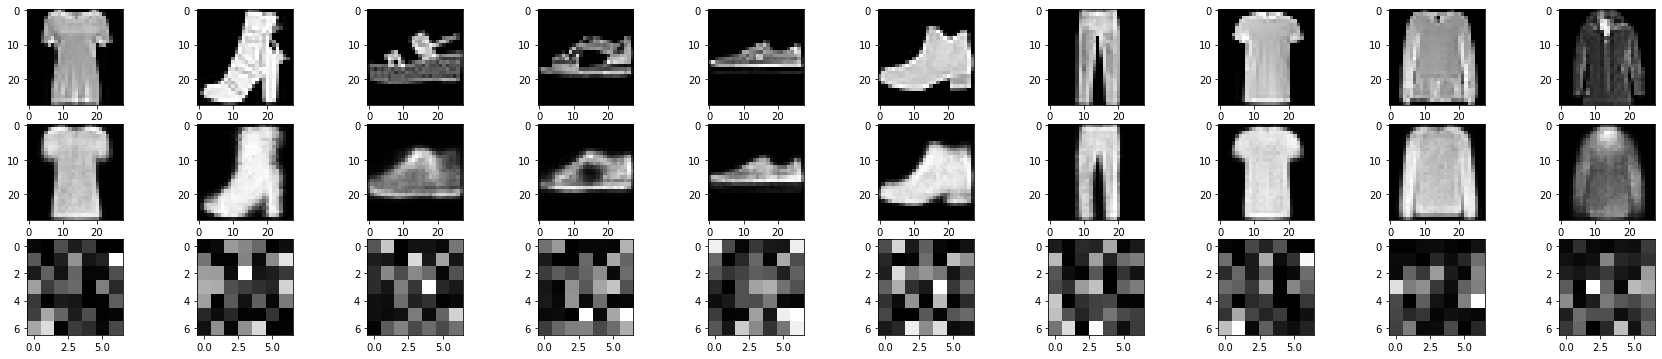

In [0]:
n = 10  # how many digits we will display
plt.figure(figsize=(30,6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.gray()
    plt.imshow(x_train[i+10].reshape(28, 28))
    
    

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(DAE_decoded_imgs_train[i+10].reshape(28, 28))

    #display latent representation
    ax = plt.subplot(3, n, i+1+ n*2)
    plt.imshow(DAE_encoded_imgs_train[i+10].reshape(7,7))
   
plt.show()

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(DAE_encoded_imgs_train)
ypredenc = kmeans.predict(DAE_encoded_imgs_train).tolist()
y_train = y_train.reshape(60000,).tolist()

In [0]:
y_train

[9,
 0,
 0,
 3,
 0,
 2,
 7,
 2,
 5,
 5,
 0,
 9,
 5,
 5,
 7,
 9,
 1,
 0,
 6,
 4,
 3,
 1,
 4,
 8,
 4,
 3,
 0,
 2,
 4,
 4,
 5,
 3,
 6,
 6,
 0,
 8,
 5,
 2,
 1,
 6,
 6,
 7,
 9,
 5,
 9,
 2,
 7,
 3,
 0,
 3,
 3,
 3,
 7,
 2,
 2,
 6,
 6,
 8,
 3,
 3,
 5,
 0,
 5,
 5,
 0,
 2,
 0,
 0,
 4,
 1,
 3,
 1,
 6,
 3,
 1,
 4,
 4,
 6,
 1,
 9,
 1,
 3,
 5,
 7,
 9,
 7,
 1,
 7,
 9,
 9,
 9,
 3,
 2,
 9,
 3,
 6,
 4,
 1,
 1,
 8,
 8,
 0,
 1,
 1,
 6,
 8,
 1,
 9,
 7,
 8,
 8,
 9,
 6,
 6,
 3,
 1,
 5,
 4,
 6,
 7,
 5,
 5,
 9,
 2,
 2,
 2,
 7,
 6,
 4,
 1,
 8,
 7,
 7,
 5,
 4,
 2,
 9,
 1,
 7,
 4,
 6,
 9,
 7,
 1,
 8,
 7,
 1,
 2,
 8,
 0,
 9,
 1,
 8,
 7,
 0,
 5,
 8,
 6,
 7,
 2,
 0,
 8,
 7,
 1,
 6,
 2,
 1,
 9,
 6,
 0,
 1,
 0,
 5,
 5,
 1,
 7,
 0,
 5,
 8,
 4,
 0,
 4,
 0,
 6,
 6,
 4,
 0,
 0,
 4,
 7,
 3,
 0,
 5,
 8,
 4,
 1,
 1,
 2,
 9,
 2,
 8,
 5,
 0,
 6,
 3,
 4,
 6,
 0,
 9,
 1,
 7,
 3,
 8,
 5,
 8,
 3,
 8,
 5,
 2,
 0,
 8,
 7,
 0,
 3,
 5,
 0,
 6,
 5,
 2,
 7,
 5,
 2,
 6,
 8,
 2,
 6,
 8,
 0,
 4,
 4,
 4,
 4,
 4,
 1,
 5,
 6,
 5,
 3,
 3,
 7,


In [0]:
from sklearn import metrics
print(metrics.adjusted_rand_score(y_train, ypredenc))

0.34413332478052966
